### Summary


This project applies the <a href="https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm"> k-nearest neighbors algorithm </a> on the <a hredf="https://archive.ics.uci.edu/ml/datasets/automobile">automobile data set</a>. The goal is to predict car prices from different set of features. It uses a complete <a href="https://scikit-learn.org/stable/index.html">scikit</a> machine learning work including train-test-split, instantiating, fitting, predicting and evaluating the knn-model. The pandas package is use for data cleaning, imputing, and subsetting. Data visualization are provided on the way and so are different functions created. The considerations and predictions are given below.


### Import Python packages

In [1447]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools

In [1448]:
column_names = ["symboling",
"normalized-losses",
"make",
"fuel-type",
"aspiration",
"num-of-doors",
"body-style",
"drive-wheels",
"engine-location",
"wheel-base",
"length",
"width",
"height",
"curb-weight",
"engine-type",
"num-of-cylinders",
"engine-size",
"fuel-system",
"bore",
"stroke",
"compression-ratio",
"horsepower",
"peak-rpm",
"city-mpg",
"highway-mpg",
"price"
]

In [1449]:
column_names[0:6]

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors']

### Import data

In [1450]:
cars=pd.read_csv("imports-85.data", header=None, names= column_names)

### Explore data

In [1451]:
cars.shape

(205, 26)

In [1452]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [1453]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [1454]:
cars.tail()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


On the first look there are some major issues with the data types. 
For example num-of-doors is a "non-null object". This points out to data type "string".
A closer look seems necessary.
Also missing values are coded with a question mark it seems.

In [1455]:
for i in cars.columns:
    print(i, type(cars.iloc[5][i]))

symboling <class 'numpy.int64'>
normalized-losses <class 'str'>
make <class 'str'>
fuel-type <class 'str'>
aspiration <class 'str'>
num-of-doors <class 'str'>
body-style <class 'str'>
drive-wheels <class 'str'>
engine-location <class 'str'>
wheel-base <class 'numpy.float64'>
length <class 'numpy.float64'>
width <class 'numpy.float64'>
height <class 'numpy.float64'>
curb-weight <class 'numpy.int64'>
engine-type <class 'str'>
num-of-cylinders <class 'str'>
engine-size <class 'numpy.int64'>
fuel-system <class 'str'>
bore <class 'str'>
stroke <class 'str'>
compression-ratio <class 'numpy.float64'>
horsepower <class 'str'>
peak-rpm <class 'str'>
city-mpg <class 'numpy.int64'>
highway-mpg <class 'numpy.int64'>
price <class 'str'>


There are clearly issues with the data types.
Even the important target variable price is coded as a string, but it should be a continuous variable.

Target variable: price.

In [1456]:
cars[10:15]['price']

10    16430
11    16925
12    20970
13    21105
14    24565
Name: price, dtype: object

In [1457]:
print(type(cars['price']))
print(type(cars.iloc[10]['price']))

<class 'pandas.core.series.Series'>
<class 'str'>


The price variable should be of course a continuous variable.

Missing values?

In [1458]:
cars['price'].isnull().sum()

0

In [1459]:
# cars['price'].unique()
questionmark_or_not = list()

for i in cars['price']:
    if i == "?": 
        questionmark_or_not.append(1)
    else:
        questionmark_or_not.append(0)
        
print(questionmark_or_not)
print(sum(questionmark_or_not))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
4


In [1460]:
number_questionmarks = sum([1 for x in cars['price'] if x =="?"])
number_questionmarks

4

Missing values? How many question marks are there in any variable?

In [1461]:
cars.isnull().sum()[0:5]
# There none null values because missing values are coded as "?".

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
dtype: int64

In [1462]:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [1463]:
qm_per_column = dict()

for i in cars.columns:
    nq=sum([1 for x in cars[i] if x =="?"])
    qm_per_column[i] = nq
    
print(qm_per_column)

{'symboling': 0, 'normalized-losses': 41, 'make': 0, 'fuel-type': 0, 'aspiration': 0, 'num-of-doors': 2, 'body-style': 0, 'drive-wheels': 0, 'engine-location': 0, 'wheel-base': 0, 'length': 0, 'width': 0, 'height': 0, 'curb-weight': 0, 'engine-type': 0, 'num-of-cylinders': 0, 'engine-size': 0, 'fuel-system': 0, 'bore': 4, 'stroke': 4, 'compression-ratio': 0, 'horsepower': 2, 'peak-rpm': 2, 'city-mpg': 0, 'highway-mpg': 0, 'price': 4}


In [1464]:
cars_2 = cars.copy()

In [1465]:
cars_2=cars_2.replace("?", np.nan)

In [1466]:
car2_null_series=cars_2.isnull().sum()
print(type(car2_null_series))
# print(bb)
print(car2_null_series.index)
# print(bb.index[0])

<class 'pandas.core.series.Series'>
Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [1467]:
cars2_index = list(car2_null_series.index)
for a, i in zip(cars2_index, car2_null_series):
    if i != 0:
        print (a, ":", i)

normalized-losses : 41
num-of-doors : 2
bore : 4
stroke : 4
horsepower : 2
peak-rpm : 2
price : 4


In [1468]:
cars_2 = cars.copy()

In [1469]:
cars_2=cars_2.replace("?", np.nan)

In [1470]:
car2_null_series=cars_2.isnull().sum()
print(type(car2_null_series))
# print(bb)
print(car2_null_series.index)
# print(bb.index[0])

<class 'pandas.core.series.Series'>
Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [1471]:
cars2_index = list(car2_null_series.index)
for a, i in zip(cars2_index, car2_null_series):
    if i != 0:
        print (a, ":", i)

normalized-losses : 41
num-of-doors : 2
bore : 4
stroke : 4
horsepower : 2
peak-rpm : 2
price : 4


Missing values: impute or drop or not using the variable as feature?<br>
In a data set with 205 observations dropping 41 could records of "normalized-losses"<br>
would have an impact on the quality of the data. <br>
The other columns have less missing values and therefore less impact.

Imputing missing values in 'normalized-losses' with the median of this variable.

In [1472]:
cars_2['normalized-losses'] = cars_2['normalized-losses'].astype(float)
type(cars_2.loc[4, 'normalized-losses'])

numpy.float64

In [1473]:
print(cars_2[0:5]['normalized-losses'])

0      NaN
1      NaN
2      NaN
3    164.0
4    164.0
Name: normalized-losses, dtype: float64


In [1474]:
cars_2['normalized-losses'] = cars_2['normalized-losses'].fillna(cars_2['normalized-losses'].median())

In [1475]:
cars_2['normalized-losses'].describe()

count    205.000000
mean     120.600000
std       31.805105
min       65.000000
25%      101.000000
50%      115.000000
75%      137.000000
max      256.000000
Name: normalized-losses, dtype: float64

Drop all the remaining nan-observations from the data frame.

In [1476]:
continuous_features = ["symboling", "normalized-losses",
"wheel-base",
"length",
"width",
"height",
"curb-weight",
"engine-size",
"bore",
"stroke",
"compression-ratio",
"horsepower",
"peak-rpm",
"city-mpg",
"highway-mpg",
"price"]



In [1477]:
for i in continuous_features:
    cars_2[i]=cars_2[i].astype(np.float64)

In [1478]:
cars_2 = cars_2.dropna()

In [1479]:
cars_2.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [1480]:
continuous_features = ["normalized-losses",
"wheel-base",
"length",
"width",
"height",
"curb-weight",
"engine-size",
"bore",
"stroke",
"compression-ratio",
"horsepower",
"peak-rpm",
"city-mpg",
"highway-mpg",
"price"]

In [1481]:
continuous_features

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

Feature selection: continuous variables are selected as features.

In [1482]:
cars_3 = cars_2.copy()
cars_3 = cars_3[continuous_features]
cars_3.info()
# cars_3.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 204
Data columns (total 15 columns):
normalized-losses    193 non-null float64
wheel-base           193 non-null float64
length               193 non-null float64
width                193 non-null float64
height               193 non-null float64
curb-weight          193 non-null float64
engine-size          193 non-null float64
bore                 193 non-null float64
stroke               193 non-null float64
compression-ratio    193 non-null float64
horsepower           193 non-null float64
peak-rpm             193 non-null float64
city-mpg             193 non-null float64
highway-mpg          193 non-null float64
price                193 non-null float64
dtypes: float64(15)
memory usage: 24.1 KB


Data transformation: Normalizing the features with min-max except the price variable.

In [1483]:
cars_4 = cars_3.copy()
# cars_normal = (cars_4 - cars_4.mean()) / cars_4.std()
cars_normal = (cars_4 - cars_4.min())/(cars_4.max() - cars_4.min())
cars_normal['price'] = cars_3['price']
cars_normal.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.261780,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.261780,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.261780,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


C:\Users\gamarandor\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


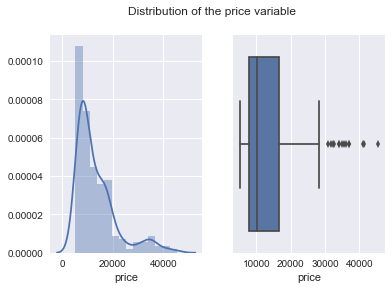

In [1484]:
fig, axes = plt.subplots(1,2)

fig.suptitle('Distribution of the price variable')
sns.distplot(cars_normal['price'], ax=axes[0])
sns.boxplot(cars_normal['price'], ax=axes[1])
sns.set(rc={'figure.figsize':(25,5)})
sns.set(style="darkgrid")
plt.show()

In [1485]:
cars_normal['price'].aggregate(['mean', 'std', "median", 'min', 'max'])

mean      13285.025907
std        8089.082886
median    10245.000000
min        5118.000000
max       45400.000000
Name: price, dtype: float64

In [1486]:
price_above_40000 = cars_normal.loc[cars_normal['price'] > 40000, "price"]
print(price_above_40000)
print(len(price_above_40000))

16    41315.0
73    40960.0
74    45400.0
Name: price, dtype: float64
3


In [1487]:
price_above_30000 = cars_normal.loc[cars_normal['price'] > 30000, "price"]
len(price_above_30000)

14

There are only three values above 40000. This three values distort the distribution.

In [1488]:
cars_normal = cars_normal.loc[cars_normal['price']<40000, :]
# cars_normal.info()
cars_normal.shape

(190, 15)

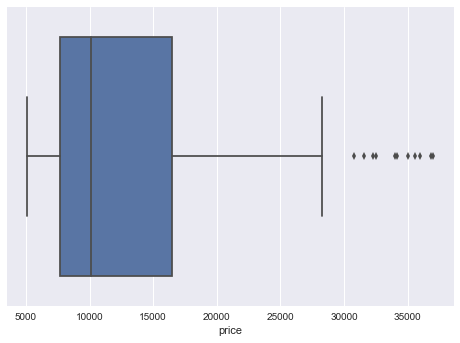

In [1489]:

sns.boxplot(cars_normal['price'])
plt.show()

Looking at the distributions of the variables using boxplot and histograms.

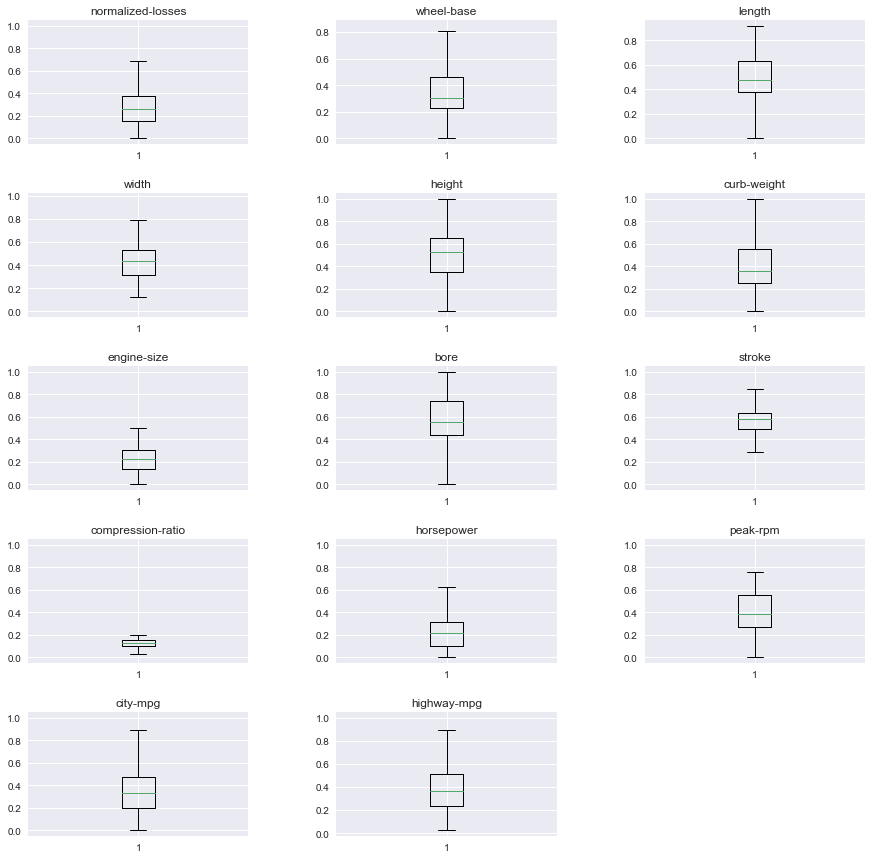

In [1490]:


fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.set_figheight(15)
fig.set_figwidth(15)

for i ,b in zip(range(1, 15), cars_3.columns):
    plt.subplot(5, 3, i)
    plt.boxplot(cars_normal[b])
    plt.title(b)
plt.show()

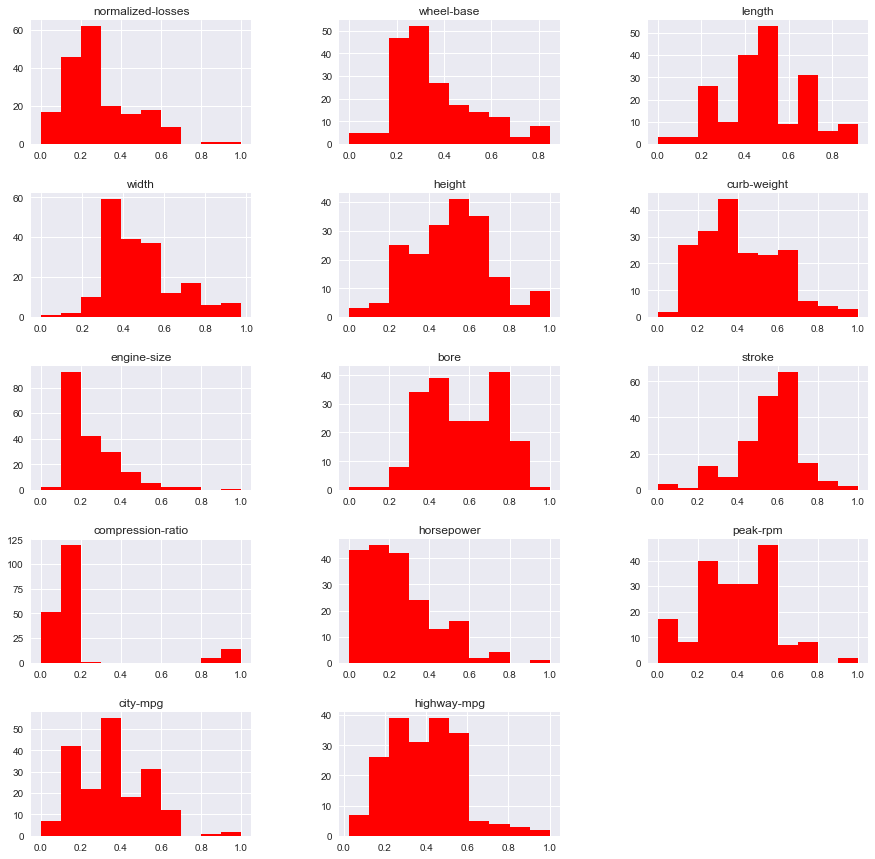

In [1491]:
fig_2 = plt.figure()
fig_2.subplots_adjust(hspace=0.4, wspace=0.4)
fig_2.set_figheight(15)
fig_2.set_figwidth(15)

for i ,b in zip(range(1, 15), cars_3.columns):
    plt.subplot(5, 3, i)
    plt.hist(cars_normal[b], color=["red"])
    plt.title(b)
plt.show()

Does the normalization has an impact on the distribution?

Text(0.5, 1.0, 'length distribution not normalized')

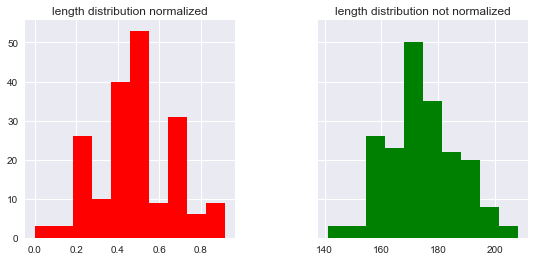

In [1492]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.subplots_adjust(hspace=0.4, wspace=0.4)
f.set_figheight(4)
f.set_figwidth(9)
ax1.hist(cars_normal["length"], color=["red"])
ax1.set_title('length distribution normalized')
ax2.hist(cars_3["length"], color=["green"])
ax2.set_title('length distribution not normalized')

Text(0.5, 1.0, 'horsepower distribution not normalized')

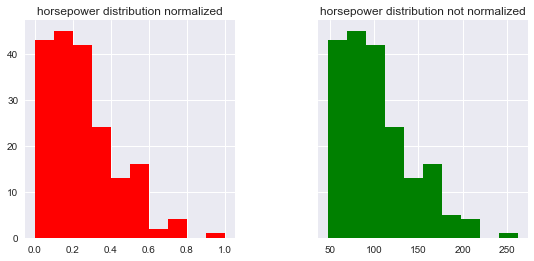

In [1493]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.subplots_adjust(hspace=0.4, wspace=0.4)
f.set_figheight(4)
f.set_figwidth(9)
ax1.hist(cars_normal["horsepower"], color=["red"])
ax1.set_title('horsepower distribution normalized')
ax2.hist(cars_3["horsepower"], color=["green"])
ax2.set_title('horsepower distribution not normalized')



It seems the data transformation did not influence the shape of the distribution.

### Making price predictions on the cars_normal data set. 
<p>
Doing a train-test-split using scikit-learn functionality.
</p>

In [1494]:
cars_normal_1 = cars_normal.copy()
cars_normal_1.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [1495]:

# Creating a series containing the target variable.
y1 = cars_normal_1['price']
# Creating a data frame containing the features.
X1 = cars_normal_1.drop('price', axis=1)

# X1.info()
# type(y1)


In [1496]:

# sklearn.model_selection.train_test_split(*arrays, **options)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# >>> X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X1_train, X1_test, y1_train, y1_test= train_test_split(X1, y1, test_size=0.33, random_state=42)

print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(127, 14) (63, 14) (127,) (63,)


Train, test and evaluate a K nearest neighbour model using all variables of cars_normal as features.

In [1497]:

knn_1 = KNeighborsRegressor(algorithm='auto', n_neighbors=5)
knn_1.fit(X1_train, y1_train)
predictions_1 = knn_1.predict(X1_test)
mse_1 = mean_squared_error(y1_test, predictions_1)
rmse_1 = np.sqrt(mse_1)

In [1498]:
rmse_1

3017.7489285153524

Train, test and evaluate a K nearest neighbour model using only the variable horsepower of cars_normal as features.

In [1499]:
y2 = cars_normal_1['price']
X2 = cars_normal_1['horsepower']

print(X2[0:2])
print(X2.shape)
print(type(X2))
print(y2[0:2])
print(y2.shape)
print(type(y2))

0    0.294393
1    0.294393
Name: horsepower, dtype: float64
(190,)
<class 'pandas.core.series.Series'>
0    13495.0
1    16500.0
Name: price, dtype: float64
(190,)
<class 'pandas.core.series.Series'>


Reshaping the pd.series so it will have one column.

In [1500]:
y2_array=np.array(y2, dtype=pd.Series)
y2_array=y2_array.reshape(-1, 1)
print(y2_array.shape)

X2_array = np.array(X2, dtype=pd.Series)
X2_array = X2_array.reshape(-1,1)
print(X2_array.shape)

(190, 1)
(190, 1)


In [1501]:
X2_train, X2_test, y2_train, y2_test= train_test_split(X2_array , y2_array, test_size=0.33, random_state=42)
print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(127, 1) (63, 1) (127, 1) (63, 1)


In [1502]:
knn_2 = KNeighborsRegressor(algorithm='auto', n_neighbors=5)
knn_2.fit(X2_train, y2_train)
predictions_2 = knn_2.predict(X2_test)
mse_2 = mean_squared_error(y2_test, predictions_2)
rmse_2 = np.sqrt(mse_2)

In [1503]:
rmse_2

4208.4528002656152

Train, test and evaluate a K nearest neighbour model using only three variables of cars_normal as features.

In [1504]:
X3= cars_normal_1[['bore', 'stroke', 'compression-ratio']]
y3 = cars_normal_1['price']

In [1505]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, random_state=55, test_size=0.33)

In [1506]:
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(127, 3) (63, 3) (127,) (63,)


In [1507]:
knn_3 = KNeighborsRegressor(algorithm='auto', n_neighbors=5)
knn_3.fit(X3_train,  y3_train)
predictions_3 = knn_3.predict(X3_test)
mse_3 = mean_squared_error(y3_test, predictions_3)
rmse_3 = np.sqrt(mse_3)


In [1508]:
rmse_3

4986.6394310435253

In [1509]:
print(rmse_1)
print(rmse_2)
print(rmse_3)

3017.74892852
4208.45280027
4986.63943104


The model with the one feature horsepower and all features perform equally good.
Of course the number of nearest neighbors is 5. The variation can lead to 
diverging results.

Making a function split, train, test, predict and evaluate the error of the predictions.

In [1510]:
def knn_train_test(features, target, df):
    # input as string - raise warning if not?
    X=df[features]
    y=df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
    knn = KNeighborsRegressor(algorithm="auto", n_neighbors=5)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    
    

In [1511]:
cars_normal_1.columns

Index(['normalized-losses', 'wheel-base', 'length', 'width', 'height',
       'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [1512]:
knn_train_test(['bore', 'stroke', 'compression-ratio'], 'price', cars_normal_1 )

6811.7723470893707

In [1513]:
knn_train_test(['bore'], 'price', cars_normal_1 )

5928.9792217065979

In [1514]:
# Make a list of name of all features excluding price
features_all_55 = list(cars_normal_1.columns)
del features_all_55[-1]
features_all_55

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

In [1515]:
knn_train_test(features_all_55, 'price', cars_normal_1 )

3602.7459404058886

In [1516]:
RMSE_values_of_one_feature_models = dict()


for col in features_all_55:
    rmse=knn_train_test([col], 'price', cars_normal_1)
    RMSE_values_of_one_feature_models[col] = rmse
    print('RMSE of', col, ':' , rmse)
    

RMSE of normalized-losses : 7172.6465864
RMSE of wheel-base : 5912.41440715
RMSE of length : 5207.82178163
RMSE of width : 3474.54441175
RMSE of height : 7632.94454834
RMSE of curb-weight : 3445.39996674
RMSE of engine-size : 3124.22411834
RMSE of bore : 5928.97922171
RMSE of stroke : 7117.38944036
RMSE of compression-ratio : 6808.47682786
RMSE of horsepower : 4449.88093302
RMSE of peak-rpm : 6993.46182804
RMSE of city-mpg : 3822.67736906
RMSE of highway-mpg : 3866.89389341


In [1517]:
RMSE_values_of_one_feature_models

{'bore': 5928.9792217065979,
 'city-mpg': 3822.6773690617033,
 'compression-ratio': 6808.4768278635975,
 'curb-weight': 3445.3999667373378,
 'engine-size': 3124.2241183351912,
 'height': 7632.944548344055,
 'highway-mpg': 3866.8938934055514,
 'horsepower': 4449.8809330245276,
 'length': 5207.8217816287015,
 'normalized-losses': 7172.646586395661,
 'peak-rpm': 6993.4618280446375,
 'stroke': 7117.3894403576296,
 'wheel-base': 5912.414407152527,
 'width': 3474.5444117475813}

In [1518]:
RMSE_values_of_one_feature_models_df = pd.DataFrame.from_dict(RMSE_values_of_one_feature_models, orient='index')
RMSE_values_of_one_feature_models_df.rename(index=str, columns={0: "RMSE"}, inplace=True)

In [1519]:
RMSE_values_of_one_feature_models_df_sort=RMSE_values_of_one_feature_models_df.sort_values(by="RMSE")
RMSE_values_of_one_feature_models_df_sort

,RMSE
engine-size,3124.224118
curb-weight,3445.399967
width,3474.544412
city-mpg,3822.677369
highway-mpg,3866.893893
horsepower,4449.880933
length,5207.821782
wheel-base,5912.414407
bore,5928.979222
compression-ratio,6808.476828


The single feature model based on engine size performs best. The worst performing model is base on height.

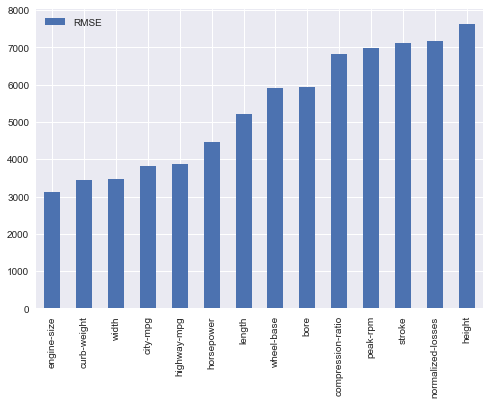

In [1520]:
RMSE_values_of_one_feature_models_df_sort.plot(kind="bar")

Augmenting the knn_train_test by different input values of k-nearest neighbors.

In [1521]:
def knn_train_test_k(features, target, df, k_list ):
    # input as string - raise warning if not?
    X=df[features]
    y=df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
    for k in k_list:
        knn = KNeighborsRegressor(algorithm="auto", n_neighbors=k)
        knn.fit(X_train, y_train)
        predictions = knn.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        print("Number of k:", k, rmse)

In [1522]:
k_list_1 = [1,2,3,4,5,6,7,8,9,10]
knn_train_test_k(features_all_55, 'price', cars_normal_1, k_list_1)

Number of k: 1 3172.67231761
Number of k: 2 2966.47423266
Number of k: 3 3363.12792017
Number of k: 4 3457.43815824
Number of k: 5 3602.74594041
Number of k: 6 3653.62626521
Number of k: 7 3824.32425793
Number of k: 8 3836.33975901
Number of k: 9 4032.06478433
Number of k: 10 4032.87597541


The model with k = 2 generates the lowes RMSE based on a model with all features. 

In [1523]:
RMSE_values_of_one_feature_models = dict()


for col in features_all_55:
    rmse=knn_train_test([col], 'price', cars_normal_1)
    RMSE_values_of_one_feature_models[col] = rmse
    print('RMSE of', col, ':' , rmse)

RMSE of normalized-losses : 7172.6465864
RMSE of wheel-base : 5912.41440715
RMSE of length : 5207.82178163
RMSE of width : 3474.54441175
RMSE of height : 7632.94454834
RMSE of curb-weight : 3445.39996674
RMSE of engine-size : 3124.22411834
RMSE of bore : 5928.97922171
RMSE of stroke : 7117.38944036
RMSE of compression-ratio : 6808.47682786
RMSE of horsepower : 4449.88093302
RMSE of peak-rpm : 6993.46182804
RMSE of city-mpg : 3822.67736906
RMSE of highway-mpg : 3866.89389341


In [1524]:

def knn_train_test_k_one_feature(features, target, df, k_list ):
    RMSE_values_of_one_feature_models = dict()
    for col in features:
            X=df[[col]]
            y=df[target]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
            for k in k_list:
                knn = KNeighborsRegressor(algorithm="auto", n_neighbors=k)
                knn.fit(X_train, y_train)
                predictions = knn.predict(X_test)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                RMSE_values_of_one_feature_models = dict()
                RMSE_values_of_one_feature_models[k] = rmse
                print(col,"- k", k, ":", rmse)

In [1525]:
knn_train_test_k_one_feature(features_all_55, 'price', cars_normal_1, k_list_1)

normalized-losses - k 1 : 7655.41955658
normalized-losses - k 2 : 7202.95646504
normalized-losses - k 3 : 6806.84414066
normalized-losses - k 4 : 7042.70041877
normalized-losses - k 5 : 7172.6465864
normalized-losses - k 6 : 7222.97093811
normalized-losses - k 7 : 7164.49099622
normalized-losses - k 8 : 7226.49129039
normalized-losses - k 9 : 7096.95941528
normalized-losses - k 10 : 6921.29897932
wheel-base - k 1 : 5219.97631814
wheel-base - k 2 : 5406.59895406
wheel-base - k 3 : 5730.92157838
wheel-base - k 4 : 5863.53199686
wheel-base - k 5 : 5912.41440715
wheel-base - k 6 : 5839.01693473
wheel-base - k 7 : 6033.79052765
wheel-base - k 8 : 5945.84797809
wheel-base - k 9 : 5998.97753817
wheel-base - k 10 : 6090.10134745
length - k 1 : 4376.89599189
length - k 2 : 4401.19526875
length - k 3 : 4747.54467275
length - k 4 : 5064.48482618
length - k 5 : 5207.82178163
length - k 6 : 5482.69218337
length - k 7 : 5570.60889147
length - k 8 : 5696.50352022
length - k 9 : 5716.46744408
length -

In [1526]:

def knn_train_test_k_one_feature_2(features, target, df, k_list ):
    
    for col in features:
            X=df[[col]]
            y=df[target]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
            RMSE_values_of_one_feature_models[col] = dict()
            for k in k_list:
                knn = KNeighborsRegressor(algorithm="auto", n_neighbors=k)
                knn.fit(X_train, y_train)
                predictions = knn.predict(X_test)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                RMSE_values_of_one_feature_models[col][k] = rmse
    return RMSE_values_of_one_feature_models

In [1527]:
one_feature_10_k_dict = knn_train_test_k_one_feature_2(features_all_55, 'price', cars_normal_1, k_list_1)

In [1528]:
one_feature_10_k_dict["curb-weight"]

{1: 3544.8238678343741,
 2: 3707.9212671004589,
 3: 3166.7447016283145,
 4: 3291.8371042372883,
 5: 3445.3999667373378,
 6: 3730.9146709871229,
 7: 3498.4302450936761,
 8: 3506.5091437211454,
 9: 3650.727398332976,
 10: 3893.0381193726944}

These are the values of the one feature model for k-values from 1 to 10.

In [1529]:
list(one_feature_10_k_dict.keys())

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg']

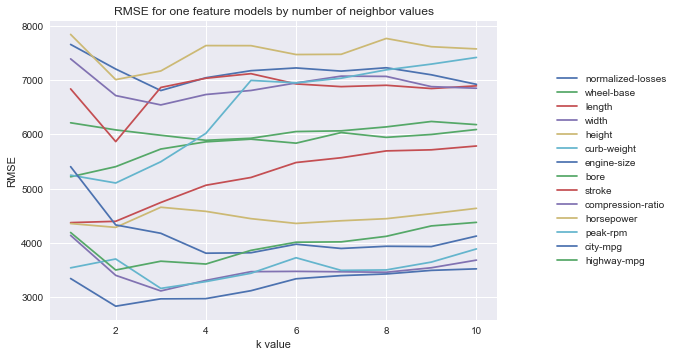

In [1530]:
# print(one_feature_10_k_dict.keys())
# print(one_feature_10_k_dict.values())
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

for k,v in one_feature_10_k_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.title("RMSE for one feature models by number of neighbor values")
    plt.legend(loc='right', labels=list(one_feature_10_k_dict.keys()), bbox_to_anchor=(1.4,0.5))

plt.show()

In [1531]:
# df =pd.DataFrame.from_dict(d,orient='index')
one_feature_10_k_df = pd.DataFrame.from_dict(one_feature_10_k_dict, orient='index')
one_feature_10_k_df

,1,2,3,4,5,6,7,8,9,10
bore,6213.877660,6083.036520,5984.176061,5891.890396,5928.979222,6052.444400,6065.760340,6138.452995,6238.026597,6180.048354
city-mpg,5406.583578,4334.385436,4180.705114,3814.482830,3822.677369,3979.434350,3901.589257,3941.781677,3936.447363,4129.316585
compression-ratio,7389.826082,6714.567972,6542.611831,6734.002151,6808.476828,6946.815689,7072.323499,7067.405519,6878.943701,6849.836915
curb-weight,3544.823868,3707.921267,3166.744702,3291.837104,3445.399967,3730.914671,3498.430245,3506.509144,3650.727398,3893.038119
engine-size,3348.449634,2839.012689,2975.068089,2978.664430,3124.224118,3343.733781,3402.063452,3432.360609,3498.477412,3526.592950
height,7839.939134,7007.852852,7167.112902,7634.132901,7632.944548,7469.790652,7473.808039,7765.302173,7613.801814,7573.311165
highway-mpg,4195.028148,3504.934544,3667.022580,3614.948633,3866.893893,4016.582667,4022.785235,4124.800442,4316.392179,4381.651431
horsepower,4359.434595,4289.592306,4659.885679,4584.208024,4449.880933,4362.333724,4411.035350,4449.333237,4541.227058,4639.845527
length,4376.895992,4401.195269,4747.544673,5064.484826,5207.821782,5482.692183,5570.608891,5696.503520,5716.467444,5786.842834
normalized-losses,7655.419557,7202.956465,6806.844141,7042.700419,7172.646586,7222.970938,7164.490996,7226.491290,7096.959415,6921.298979


In [1532]:
one_feature_10_k_df_min_RMSE = one_feature_10_k_df.min(axis=1).sort_values()
one_feature_10_k_df_min_RMSE

engine-size          2839.012689
width                3120.282180
curb-weight          3166.744702
highway-mpg          3504.934544
city-mpg             3814.482830
horsepower           4289.592306
length               4376.895992
peak-rpm             5106.113680
wheel-base           5219.976318
stroke               5867.719827
bore                 5891.890396
compression-ratio    6542.611831
normalized-losses    6806.844141
height               7007.852852
dtype: float64

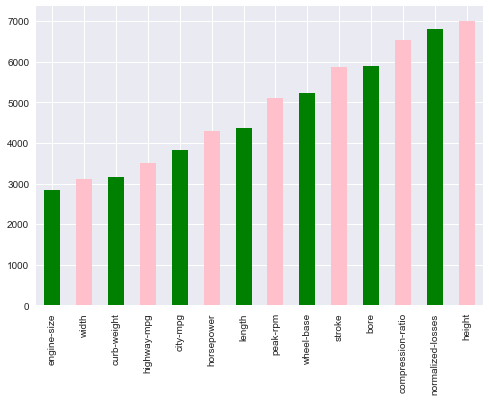

In [1533]:
one_feature_10_k_df_min_RMSE.sort_values().plot(kind='bar', color=["green", "pink"])

The lowest rmse of 2839 is based on the one feature model using the engine-size feature with k = 3.

Modifying the function so that a list of features is taken instead of using only one feature.<br>
(This is a step back in complexity of the function.)

In [1534]:
# train-test-split, modeling, tuning: n_neighbors=5(standard), predict, evaluate, store
def knn_training_many_features(features, target, df):
    

                X=df[features]
                y=df[target]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
                
                RMSE_values_many_features = []

                knn = KNeighborsRegressor(algorithm="auto")
                knn.fit(X_train, y_train)
                predictions = knn.predict(X_test)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                RMSE_values_many_features.append(rmse)
                
                return RMSE_values_many_features

In [1535]:
# using only the features with the 2 lowest RMSE's determined above
features_2_lowest_RMSE = ['engine-size', 'width']
rmse_using_2_features = knn_training_many_features(features=features_2_lowest_RMSE, target='price', df=cars_normal_1)
rmse_using_2_features

[2951.2332803288587]

In [1536]:
# using only the features with the 3 lowest RMSE's determined above
features_3_lowest_RMSE = list(one_feature_10_k_df_min_RMSE.index[0:3])
rmse_using_3_features = knn_training_many_features(features=features_3_lowest_RMSE, target='price', df=cars_normal_1)
print(list(one_feature_10_k_df_min_RMSE.index[0:3]))
print(rmse_using_3_features)

['engine-size', 'width', 'curb-weight']
[2770.2414508257243]


In [1537]:
# using only the features with the 4 lowest RMSE's determined above
features_4_lowest_RMSE = list(one_feature_10_k_df_min_RMSE.index[0:4])
rmse_using_4_features = knn_training_many_features(features=features_4_lowest_RMSE, target='price', df=cars_normal_1)
print(list(one_feature_10_k_df_min_RMSE.index[0:4]))
print(rmse_using_4_features)

['engine-size', 'width', 'curb-weight', 'highway-mpg']
[2628.3308107606335]


In [1538]:
# using only the features with the 5 lowest RMSE's determined above
features_5_lowest_RMSE = list(one_feature_10_k_df_min_RMSE.index[0:5])
rmse_using_5_features = knn_training_many_features(features=features_5_lowest_RMSE, target='price', df=cars_normal_1)
print(list(one_feature_10_k_df_min_RMSE.index[0:5]))
print(rmse_using_5_features)

['engine-size', 'width', 'curb-weight', 'highway-mpg', 'city-mpg']
[2645.4512755725764]


In [1539]:
number_features_1 = list(np.arange(2,6,1)) 
rmse_many_features = rmse_using_2_features, rmse_using_3_features, rmse_using_4_features, rmse_using_5_features
# the result is a list of lists as the function returns a list (, which is not necessary as only one value is returned)
# This could be changed but this time the list of list is flattened with itertools
# https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-list-of-lists
rmse_many_features_flat = list(itertools.chain.from_iterable(rmse_many_features))
RMSE_many_features = {'Number_features':number_features_1, 'RMSE': rmse_many_features_flat}
print(rmse_many_features_flat)
print(RMSE_many_features)

[2951.2332803288587, 2770.2414508257243, 2628.3308107606335, 2645.4512755725764]
{'Number_features': [2, 3, 4, 5], 'RMSE': [2951.2332803288587, 2770.2414508257243, 2628.3308107606335, 2645.4512755725764]}


In [1540]:
df_RMSE_many_features = pd.DataFrame(data=RMSE_many_features).sort_values(by="RMSE").reset_index(drop=True)
df_RMSE_many_features['RMSE'] = df_RMSE_many_features['RMSE'].round(2)
df_RMSE_many_features

,Number_features,RMSE
0,4,2628.33
1,5,2645.45
2,3,2770.24
3,2,2951.23


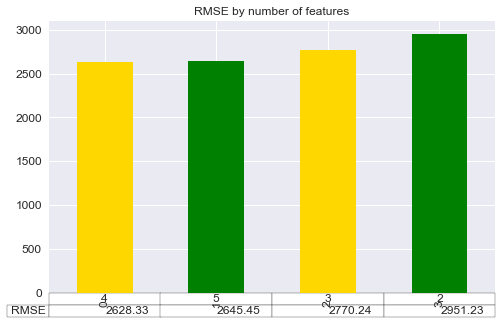

In [1541]:
df_RMSE_many_features.plot(x="Number_features", y="RMSE", kind="bar", color=["gold", "green"], legend=None, 
                           title="RMSE by number of features", figsize=(8,5), use_index=False, fontsize=12,
                           table=True)

The four feature model produces the best result, followed by 5 and then 3 features.

Modifying the function to take again a list of k with the best models from above and this time returns a sorted data frame of RMSE values. 

In [1542]:
# train-test-split, modeling, tuning: n_neighbors provided by an argument k_list, predict, evaluate, store
def knn_training_many_features_k(features, target, df, k_list):
    

                X=df[features]
                length_features = len(features)
                RMSE_name = "RMSE_with_{}_features".format(length_features)
                y=df[target]
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)
                
                RMSE_values_many_features_25_k = {}
                
                for k in k_list:

                        knn = KNeighborsRegressor(algorithm="auto", n_neighbors=k)
                        knn.fit(X_train, y_train)
                        predictions = knn.predict(X_test)
                        mse = mean_squared_error(y_test, predictions)
                        rmse = np.sqrt(mse)
                        RMSE_values_many_features_25_k[k] = rmse
                        
                rmse_2_features_25_k_df = pd.DataFrame.from_dict(RMSE_values_many_features_25_k, 
                                                                 orient='index').reset_index()
                rmse_2_features_25_k_df['Source'] = RMSE_name
                rmse_2_features_25_k_df = rmse_2_features_25_k_df.rename(index=str,columns={"index": "K", 0:"RMSE"})
                rmse_2_features_25_k_df.sort_values(by="RMSE", inplace=True)
                # return RMSE_values_many_features_25_k
                return rmse_2_features_25_k_df

In [1543]:
k_list_222 = np.arange(1,26,1)
print(k_list_222)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25]


In [1544]:

rmse_2_features_25_k = knn_training_many_features_k(features=features_2_lowest_RMSE, 
                                                    target="price", df=cars_normal_1, k_list=k_list_222 )
print(rmse_2_features_25_k.head(10))
#  19: 4326.7245834240948

    K         RMSE                Source
1   2  2168.657735  RMSE_with_2_features
0   1  2255.444482  RMSE_with_2_features
2   3  2319.005311  RMSE_with_2_features
3   4  2629.227913  RMSE_with_2_features
4   5  2951.233280  RMSE_with_2_features
5   6  3157.615815  RMSE_with_2_features
6   7  3260.709683  RMSE_with_2_features
7   8  3299.471667  RMSE_with_2_features
8   9  3519.048165  RMSE_with_2_features
9  10  3568.833758  RMSE_with_2_features


The best RMSE of 2168 Dollar of the two feature model is generated when n_neighbours is 2.

In [1545]:

rmse_3_features_25_k = knn_training_many_features_k(features=features_3_lowest_RMSE, 
                                                    target="price", df=cars_normal_1, k_list=k_list_222 )
print(rmse_3_features_25_k[['K', 'RMSE']].head())
#  19: 4326.7245834240948

   K         RMSE
1  2  2290.165728
0  1  2294.082713
2  3  2443.795793
3  4  2565.505295
4  5  2770.241451


The best RMSE of 2290 Dollar of the two feature model is generated when n_neighbours is 2.

In [1546]:
features_4_lowest_RMSE 
rmse_4_features_25_k = knn_training_many_features_k(features=features_4_lowest_RMSE, 
                                                    target="price", df=cars_normal_1, k_list=k_list_222 )
print(rmse_4_features_25_k[['K', 'RMSE']].head())

   K         RMSE
0  1  2051.296385
1  2  2073.808740
2  3  2286.265364
3  4  2403.660970
4  5  2628.330811


The best RMSE of 2051 Dollar of the two feature model is generated when n_neighbours is 1.

In [1547]:
features_5_lowest_RMSE 
rmse_5_features_25_k = knn_training_many_features_k(features=features_5_lowest_RMSE, 
                                                    target="price", df=cars_normal_1, k_list=k_list_222 )
print(rmse_5_features_25_k[['K', 'RMSE']].head())

   K         RMSE
1  2  2215.734209
2  3  2259.866310
0  1  2300.281270
3  4  2501.093852
4  5  2645.451276


In [1548]:
RMSE_many_models_agg=pd.concat([rmse_2_features_25_k, rmse_3_features_25_k, rmse_4_features_25_k, rmse_5_features_25_k])
RMSE_many_models_agg[['K', 'RMSE']].head()

,K,RMSE
1,2,2168.657735
0,1,2255.444482
2,3,2319.005311
3,4,2629.227913
4,5,2951.233280


In [1549]:
RMSE_many_models_agg.groupby("Source")["RMSE"].aggregate(["min", "mean"]).sort_values(by='min')

,min,mean
Source,,
RMSE_with_4_features,2051.296385,3553.438836
RMSE_with_2_features,2168.657735,3709.921647
RMSE_with_5_features,2215.734209,3526.290064
RMSE_with_3_features,2290.165728,3636.261499


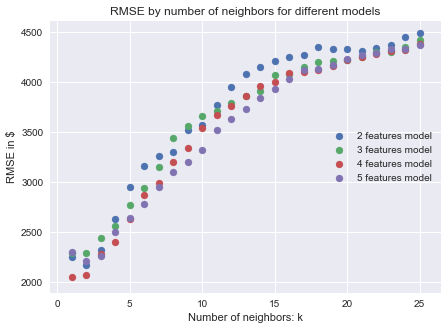

In [1550]:
fig = plt.figure(figsize=(7,5))
ax1 = fig.add_subplot(111)
ax1.scatter(rmse_2_features_25_k['K'], rmse_2_features_25_k['RMSE'])
ax1.scatter(rmse_3_features_25_k['K'], rmse_3_features_25_k['RMSE'])
ax1.scatter(rmse_4_features_25_k['K'], rmse_4_features_25_k['RMSE'])
ax1.scatter(rmse_5_features_25_k['K'], rmse_5_features_25_k['RMSE'])
ax1.set_xlabel("Number of neighbors: k")
ax1.set_ylabel("RMSE in $")
plt.title("RMSE by number of neighbors for different models")
ax1.legend(loc="center right", labels=["2 features model", "3 features model", "4 features model", "5 features model"]) 
plt.show()

The best RMSE of 2051.296385 Dollar of the two feature model is generated when n_neighbours is 4.<br>
Cross-validation and other algorithms could improve the predictions further.